In [18]:
!pip install tensorflow
!pip install matplotlib

In [19]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.models import Model
from typing import Self

# Define image dimensions
image_dimensions = {'height':256, 'width':256, 'channels':3}


In [20]:
# Create a Classifier class
class CustomClassifier:
    def __init__():
        self.model = 0
    
    def predict(self, x):
        return self.model.predict(x)
    
    def fit(self, x, y):
        return self.model.train_on_batch(x, y)
    
    def get_accuracy(self, x, y):
        return self.model.test_on_batch(x, y)
    
    def load(self, path):
        self.model.load_weights(path)


In [21]:
# Create a CustomMesoNet class using the Classifier
class CustomMeso4(CustomClassifier):
    def __init__(self, learning_rate=0.001):
        self.model = self.init_model()
        optimizer = Adam(learning_rate)
        self.model.compile(optimizer=optimizer,
                           loss='mean_squared_error',
                           metrics=['accuracy'])
    
    def init_model(self): 
        x = Input(shape=(image_dimensions['height'],
                         image_dimensions['width'],
                         image_dimensions['channels']))
        
        x1 = Conv2D(8, (3, 3), padding='same', activation='relu')(x)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)
        
        x2 = Conv2D(8, (5, 5), padding='same', activation='relu')(x1)
        x2 = BatchNormalization()(x2)
        x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)
        
        x3 = Conv2D(16, (5, 5), padding='same', activation='relu')(x2)
        x3 = BatchNormalization()(x3)
        x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)
        
        x4 = Conv2D(16, (5, 5), padding='same', activation='relu')(x3)
        x4 = BatchNormalization()(x4)
        x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)
        
        y = Flatten()(x4)
        y = Dropout(0.5)(y)
        y = Dense(16)(y)
        y = LeakyReLU(alpha=0.1)(y)
        y = Dropout(0.5)(y)
        y = Dense(1, activation='sigmoid')(y)

        return Model(inputs=x, outputs=y)


In [22]:
# Instantiate a CustomMesoNet model with pretrained weights
custom_meso = CustomMeso4()
custom_meso.load('weights/Meso4_DF.h5')



In [23]:
# Recreating generator after removing '.ipynb_checkpoints'
data_generator = ImageDataGenerator(rescale=1./255)

generator = data_generator.flow_from_directory(
    'data',
    target_size=(256, 256),
    batch_size=1,
    class_mode='binary')

# Re-checking class assignment after removing it
generator.class_indices


Found 17103 images belonging to 2 classes.


{'DeepFake': 0, 'Real': 1}

1/1 [==============================] - 0s 50ms/step
Predicted likelihood: 0.9992
Actual label: 1
1/1 [==============================] - 0s 22ms/step

Correct prediction: True


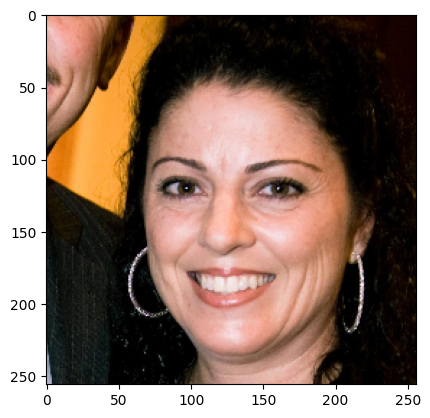

In [24]:
# Rendering image X with label y for CustomMesoNet
X, y = generator.next()

# Evaluating prediction
print(f"Predicted likelihood: {custom_meso.predict(X)[0][0]:.4f}")
print(f"Actual label: {int(y[0])}")
print(f"\nCorrect prediction: {round(custom_meso.predict(X)[0][0])==y[0]}")

# Showing image
plt.imshow(np.squeeze(X));


In [25]:
# Define a function to plot images with predictions
def plotter(images, preds):
    fig = plt.figure(figsize=(16, 9))
    subset = np.random.randint(0, len(images)-1, 12)
    for i, j in enumerate(subset):
        fig.add_subplot(3, 4, i+1)
        plt.imshow(np.squeeze(images[j]))
        plt.xlabel(f"Model confidence: \n{preds[j]:.4f}")
        plt.tight_layout()
        ax = plt.gca()
        ax.axes.xaxis.set_ticks([])
        ax.axes.yaxis.set_ticks([])
    plt.show()


In [26]:
# Generating predictions on validation set, storing in separate lists
correct_real = []
correct_real_pred = []

correct_deepfake = []
correct_deepfake_pred = []

misclassified_real = []
misclassified_real_pred = []

misclassified_deepfake = []
misclassified_deepfake_pred = []

for i in range(len(generator.labels)):
    # Loading next picture, generating prediction
    X, y = generator.next()
    pred = custom_meso.predict(X)[0][0]
    
    # Sorting into proper category
    if round(pred) == y[0] and y[0] == 1:
        correct_real.append(X)
        correct_real_pred.append(pred)
    elif round(pred) == y[0] and y[0] == 0:
        correct_deepfake.append(X)
        correct_deepfake_pred.append(pred)
    elif y[0] == 1:
        misclassified_real.append(X)
        misclassified_real_pred.append(pred)
    else:
        misclassified_deepfake.append(X)
        misclassified_deepfake_pred.append(pred)
        
    # Printing status update
    if i % 1000 == 0:
        print(i, ' predictions completed.')
    
    if i == len(generator.labels) - 1:
        print("All", len(generator.labels), "predictions completed")


1/1 [==============================] - 0s 17ms/step
0  predictions completed.
1/1 [==============================] - 0s 10ms/step
1000  predictions completed.
1/1 [==============================] - 0s 11ms/step
2000  predictions completed.
1/1 [==============================] - 0s 13ms/step
3000  predictions completed.
1/1 [==============================] - 0s 12ms/step
4000  predictions completed.
1/1 [==============================] - 0s 18ms/step
5000  predictions completed.
1/1 [==============================] - 0s 29ms/step
6000  predictions completed.
1/1 [==============================] - 0s 10ms/step
7000  predictions completed.
1/1 [==============================] - 0s 20ms/step
8000  predictions completed.
1/1 [==============================] - 0s 13ms/step
9000  predictions completed.
1/1 [==============================] - 0s 13ms/step
10000  predictions completed.
1/1 [==============================] - 0s 22ms/step
11000  predictions completed.
1/1 [========================

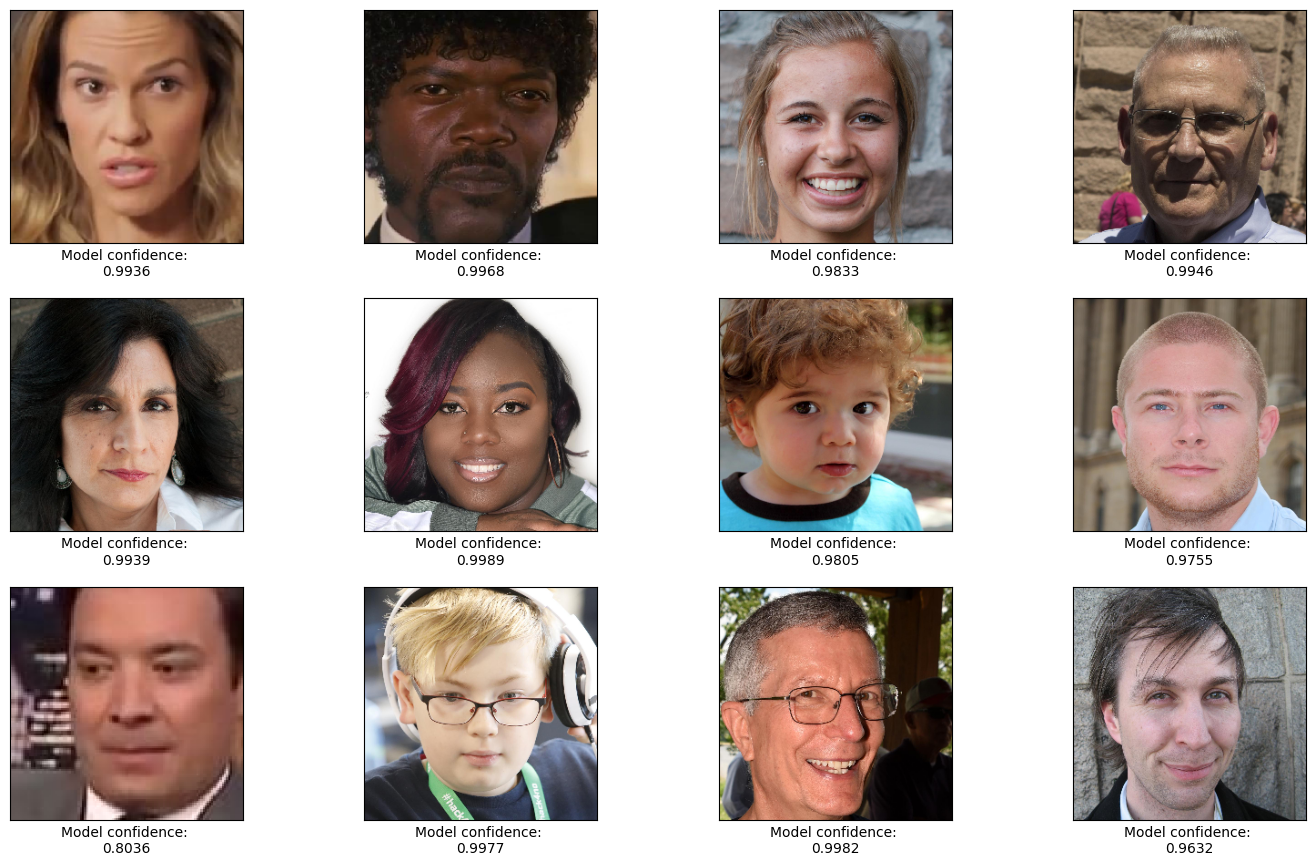

In [31]:
# Plotting images
plotter(correct_real, correct_real_pred)


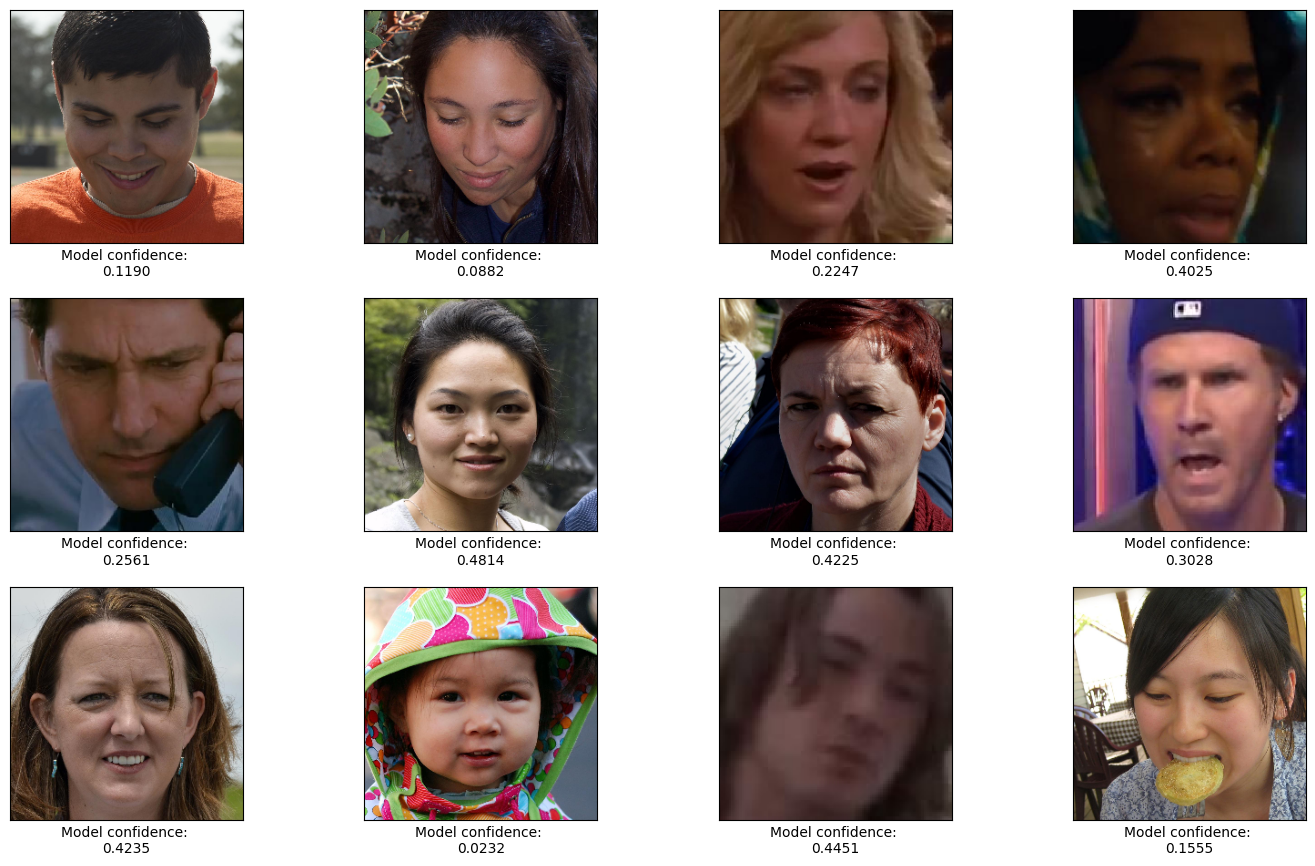

In [32]:
plotter(misclassified_real, misclassified_real_pred)


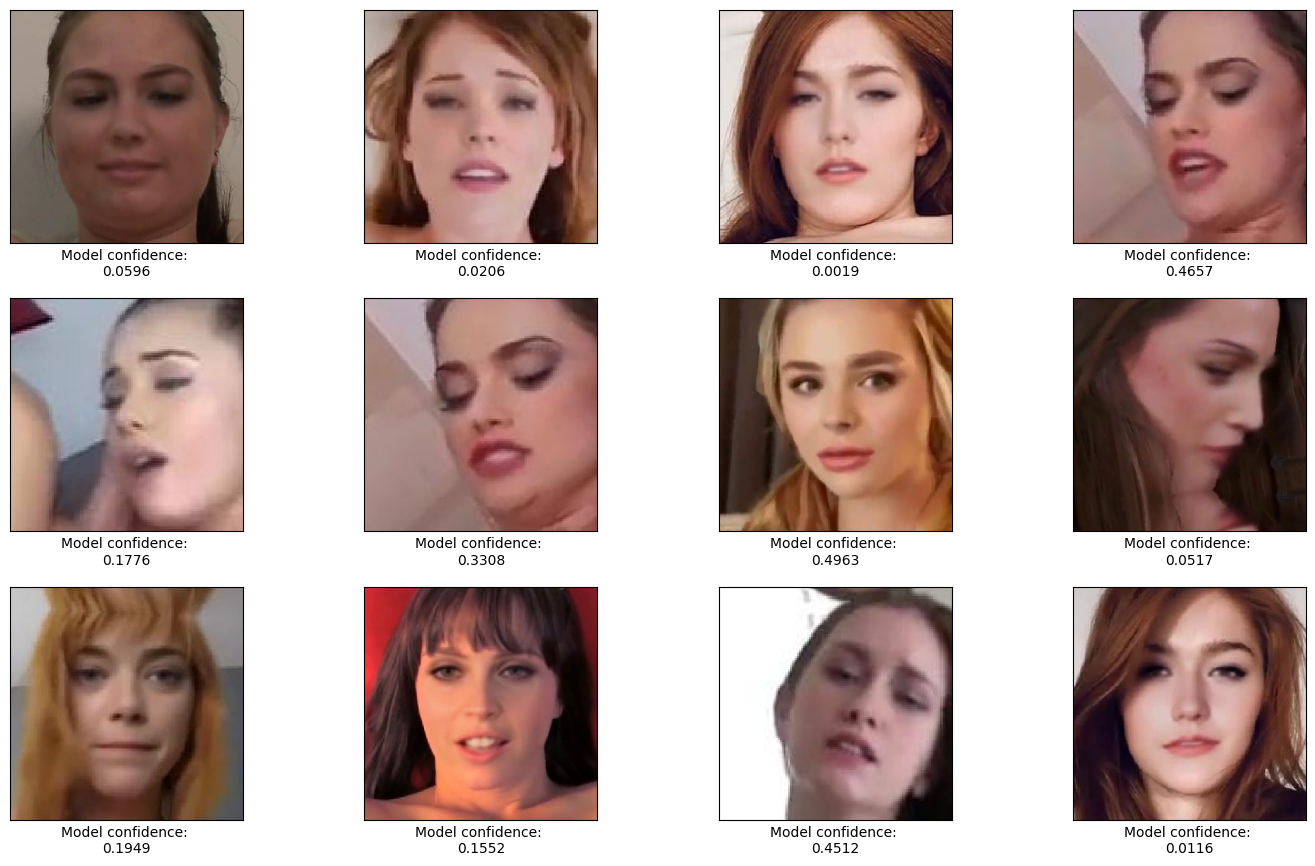

In [33]:
plotter(correct_deepfake, correct_deepfake_pred)


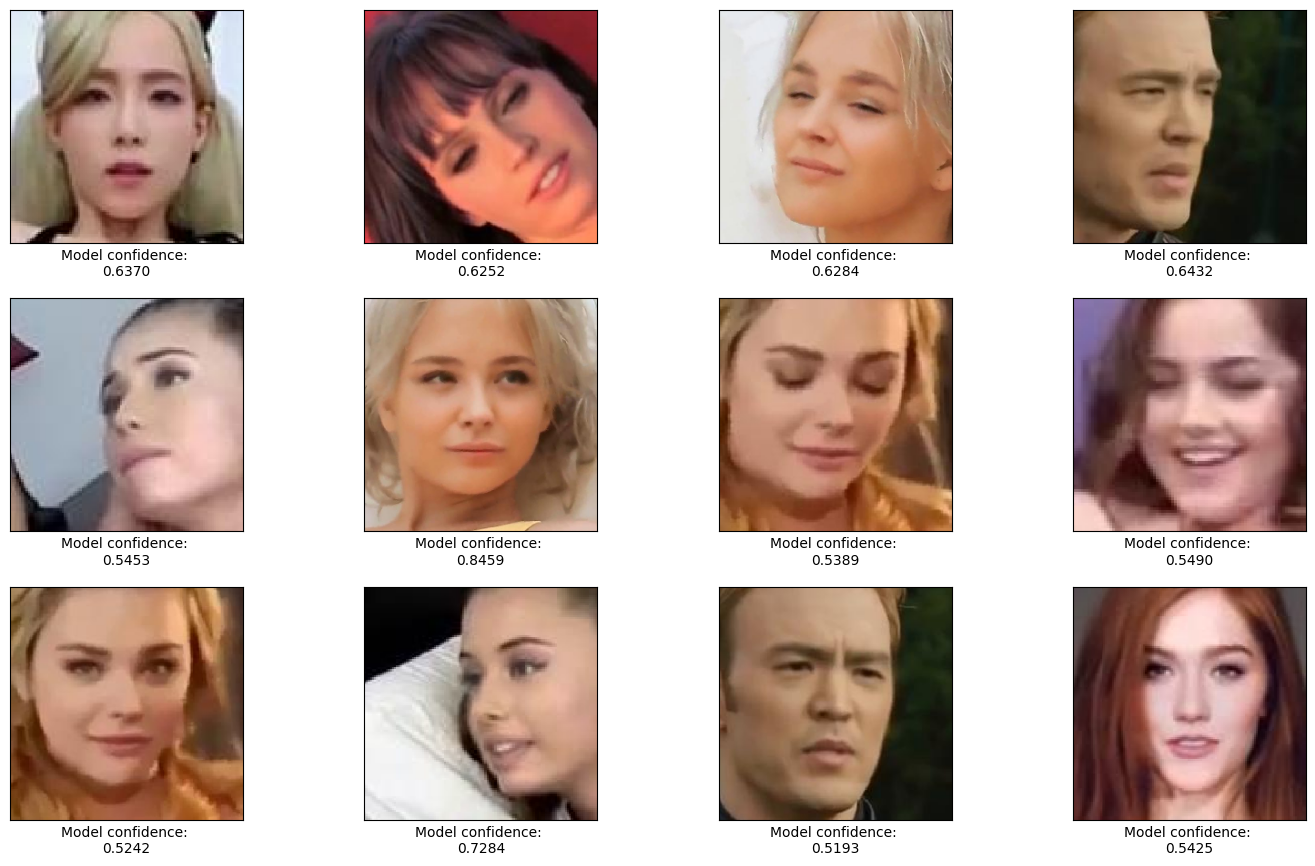

In [34]:
plotter(misclassified_deepfake, misclassified_deepfake_pred)

In [35]:


# Calculate accuracy
total_correct = len(correct_real) + len(correct_deepfake)
total_misclassified = len(misclassified_real) + len(misclassified_deepfake)
total_images = total_correct + total_misclassified

accuracy = total_correct / total_images
print("Model Accuracy:", accuracy)


Model Accuracy: 0.8968601999649184


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define and compile a simple model
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=100))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Generate dummy data
data = np.random.random((1000, 100))
labels = np.random.randint(2, size=(1000, 1))

# Train the model
model.fit(data, labels, epochs=10, batch_size=32)

# Save the model
model.save('weights/Meso4_DF.h5')

Epoch 1/10
32/32 [==============================] - 0s 433us/step - loss: 0.7069 - accuracy: 0.5110
Epoch 2/10
32/32 [==============================] - 0s 422us/step - loss: 0.6970 - accuracy: 0.5150
Epoch 3/10
32/32 [==============================] - 0s 384us/step - loss: 0.6941 - accuracy: 0.5190
Epoch 4/10
32/32 [==============================] - 0s 345us/step - loss: 0.6905 - accuracy: 0.5300
Epoch 5/10
32/32 [==============================] - 0s 352us/step - loss: 0.6832 - accuracy: 0.5620
Epoch 6/10
32/32 [==============================] - 0s 343us/step - loss: 0.6790 - accuracy: 0.5520
Epoch 7/10
32/32 [==============================] - 0s 353us/step - loss: 0.6755 - accuracy: 0.5740
Epoch 8/10
32/32 [==============================] - 0s 334us/step - loss: 0.6734 - accuracy: 0.5690
Epoch 9/10
32/32 [==============================] - 0s 501us/step - loss: 0.6708 - accuracy: 0.5790
Epoch 10/10
32/32 [==============================] - 0s 597us/step - loss: 0.6665 - accuracy: 0.5930